In [98]:
import pandas as pd
import numpy as np
import openpyxl
import re
from tqdm import tqdm
import os

In [229]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import WhitespaceTokenizer
# from nltk.tokenize import WordPunctTokenizer

from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer, word_tokenize
from nltk.tag import pos_tag

from nltk.stem import WordNetLemmatizer
from nltk import ne_chunk

In [233]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('tagsets')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package words to /Users/kimmonica/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

### def

In [116]:
def clean_text(text): 
    """ 한글, 영문, 숫자만 남기고 제거한다. 
    :param text: 
    :return: 
    """ 
    try:
        text = text.replace(".", " ").strip() 
        text = text.replace("·", " ").strip() 
        pattern = '[^ ㄱ-ㅣ가-힣|0-9|a-zA-Z]+' 
        text = re.sub(pattern=pattern, repl='', string=text)
    except:
        text = '숫자없음' 
    return text 

In [117]:
def clean_words(text): 
    """ 한글, 영문, 숫자만 남기고 제거한다. 
    :param text: 
    :return: 
    """ 
    try:
        text = text.replace(".", " ").strip() 
        text = text.replace("·", " ").strip() 
        pattern = '[^0-9]+' 
        text = re.sub(pattern=pattern, repl='', string=text) 
        text = int(text)
    except:
        text = '숫자없음'
    return text 

In [156]:
stop_words = set(stopwords.words('english')) 

#### dataset

In [101]:
df_path = '/Users/kimmonica/Documents/GitHub/Text_Mining/common_sense_movie/dataset/'
file_list = os.listdir(df_path)
file_list_py = [file for file in file_list if file.endswith('.xlsx')]

df = pd.DataFrame()
for i in file_list_py:
    data = pd.read_excel(df_path + i)
    df = pd.concat([df,data])
    
df = df.reset_index(drop = True)

In [107]:
df = df.drop(columns='Unnamed: 0')
df.head()

,movie_cnt,movie_title,age,reviews
0,245번,Andi Mack,Child,-Why do most of the kids in my school like thi...
1,245번,Andi Mack,Child,-that show is rated TV-MA
2,245번,Andi Mack,Child,"-I haven't even watched the first episodes, bu..."
3,245번,Andi Mack,Child,"-Brah, this is possibly the worst TV show I ha..."
4,245번,Andi Mack,Child,-So everyone is saying that everything about t...


In [108]:
df.to_csv('org_reviews.csv')

In [109]:
/pwd

'/Users/kimmonica/Documents/GitHub/Text_Mining/common_sense_movie'

#### data loading

In [118]:
data = df.copy()

In [111]:
data.head()

,movie_cnt,movie_title,age,reviews
0,245번,Andi Mack,Child,-Why do most of the kids in my school like thi...
1,245번,Andi Mack,Child,-that show is rated TV-MA
2,245번,Andi Mack,Child,"-I haven't even watched the first episodes, bu..."
3,245번,Andi Mack,Child,"-Brah, this is possibly the worst TV show I ha..."
4,245번,Andi Mack,Child,-So everyone is saying that everything about t...


In [113]:
df['age'].value_counts()

Child                      94647
++++Child                  57020
Teen, 13 years old         21511
++++Teen, 13 years old     12002
Teen, 14 years old         11268
Kid, 11 years old           9678
Kid, 12 years old           8483
Kid, 10 years old           7258
++++Teen, 14 years old      6312
Teen, 15 years old          6066
++++Kid, 11 years old       5614
Kid, 9 years old            4928
++++Kid, 12 years old       4527
++++Kid, 10 years old       4280
++++Teen, 15 years old      3091
++++Kid, 9 years old        2811
Kid, 8 years old            2608
Teen, 16 years old          2365
Teen, 17 years old          1605
++++Kid, 8 years old        1565
++++Teen, 16 years old      1229
Kid, 7 years old             995
++++Teen, 17 years old       691
++++Kid, 7 years old         688
Kid, 6 years old             498
++++Kid, 6 years old         377
Adult, 18 years old          185
Kid, 0 years old             170
++++Kid, 0 years old         136
++++Adult, 18 years old      122
Kid, 5 yea

In [114]:
data['age'].value_counts()

Child                      94647
++++Child                  57020
Teen, 13 years old         21511
++++Teen, 13 years old     12002
Teen, 14 years old         11268
Kid, 11 years old           9678
Kid, 12 years old           8483
Kid, 10 years old           7258
++++Teen, 14 years old      6312
Teen, 15 years old          6066
++++Kid, 11 years old       5614
Kid, 9 years old            4928
++++Kid, 12 years old       4527
++++Kid, 10 years old       4280
++++Teen, 15 years old      3091
++++Kid, 9 years old        2811
Kid, 8 years old            2608
Teen, 16 years old          2365
Teen, 17 years old          1605
++++Kid, 8 years old        1565
++++Teen, 16 years old      1229
Kid, 7 years old             995
++++Teen, 17 years old       691
++++Kid, 7 years old         688
Kid, 6 years old             498
++++Kid, 6 years old         377
Adult, 18 years old          185
Kid, 0 years old             170
++++Kid, 0 years old         136
++++Adult, 18 years old      122
Kid, 5 yea

In [119]:
data['age'] = data['age'].apply(clean_text)
data['age'] = data['age'].apply(clean_words )

In [120]:
data= data[data['age']!='숫자없음']
data['age'].value_counts()

13    33513
14    17580
11    15292
12    13010
10    11538
15     9157
9      7739
8      4173
16     3594
17     2296
7      1683
6       875
18      307
0       306
5       130
2       110
3        80
4        74
1         8
Name: age, dtype: int64

In [121]:
data['age'] = data['age'].astype(int)

In [122]:
data = data[data['age']<13]
data = data[data['age']>5]
data.age.value_counts()

11    15292
12    13010
10    11538
9      7739
8      4173
7      1683
6       875
Name: age, dtype: int64

In [123]:
data.to_csv('[230505]child_data.csv')

#### preprocessing

In [125]:
data.head()

,movie_cnt,movie_title,age,reviews
9,245번,Andi Mack,12,-Andi Mack is a fun show for kids to watch and...
10,245번,Andi Mack,12,-I absolutely loved this series but the reason...
11,245번,Andi Mack,12,-I love this show so much it is the best disne...
12,245번,Andi Mack,12,-I honestly really enjoyed Andi Mack and found...
13,245번,Andi Mack,12,"-The plot is a little predictable, but aren’t ..."


##### sentence dividing

In [142]:
def sent_number(text):
    try:
        num = len(sent_tokenize(text))
    except:
        num = '오류'
    return num

In [147]:
data.shape

(54310, 5)

In [145]:
data['sent_number'] = data['reviews'].apply(sent_number)
data.head()

,movie_cnt,movie_title,age,reviews,sent_number
9,245번,Andi Mack,12,-Andi Mack is a fun show for kids to watch and...,1
10,245번,Andi Mack,12,-I absolutely loved this series but the reason...,3
11,245번,Andi Mack,12,-I love this show so much it is the best disne...,2
12,245번,Andi Mack,12,-I honestly really enjoyed Andi Mack and found...,8
13,245번,Andi Mack,12,"-The plot is a little predictable, but aren’t ...",2


In [149]:
data['reviews'] = data['reviews'].apply(clean_text)

In [150]:
data.head()

,movie_cnt,movie_title,age,reviews,sent_number
9,245번,Andi Mack,12,Andi Mack is a fun show for kids to watch and ...,1
10,245번,Andi Mack,12,I absolutely loved this series but the reason ...,3
11,245번,Andi Mack,12,I love this show so much it is the best disney...,2
12,245번,Andi Mack,12,I honestly really enjoyed Andi Mack and found ...,8
13,245번,Andi Mack,12,The plot is a little predictable but arent mos...,2


In [151]:
data.to_csv('[230505]child_reviews_sentnum.csv')

In [236]:
full_result = []
for i in tqdm(data.reviews.to_list()):
    tokenizer = WhitespaceTokenizer()
    word_tokens = tokenizer.tokenize(i)
    
    result= []
    for word in word_tokens:
        # word = word.lower()
        if word not in stop_words:
            lemm = WordNetLemmatizer()
            word = lemm.lemmatize(word, pos = 'v')
            result.append(word)
    
    full_result.append(result)
    


100%|██████████| 54310/54310 [00:05<00:00, 10036.71it/s]


In [237]:
full_pos = []
for for_pos in tqdm(full_result):
        k = pos_tag(for_pos)
        ner_sentence = ne_chunk(k) ## NER 개체명인식
        full_pos.append(ner_sentence)

100%|██████████| 54310/54310 [04:13<00:00, 214.07it/s]


In [307]:
print(len(full_pos))

54310


In [331]:
data.shape

(54310, 6)

In [309]:
data['full_pos'] = full_pos
data.head()

,movie_cnt,movie_title,age,reviews,sent_number,full_pos
9,245번,Andi Mack,12,Andi Mack is a fun show for kids to watch and ...,1,"[[(Andi, NNP)], [(Mack, NNP)], (fun, NN), (sho..."
10,245번,Andi Mack,12,I absolutely loved this series but the reason ...,3,"[(I, PRP), (absolutely, RB), (love, VBP), (ser..."
11,245번,Andi Mack,12,I love this show so much it is the best disney...,2,"[(I, PRP), (love, VBP), (show, RB), (much, JJ)..."
12,245번,Andi Mack,12,I honestly really enjoyed Andi Mack and found ...,8,"[(I, PRP), (honestly, RB), (really, RB), (enjo..."
13,245번,Andi Mack,12,The plot is a little predictable but arent mos...,2,"[(The, DT), (plot, NN), (little, JJ), (predict..."


In [ ]:
final_pos =[]

for i in tqdm(full_pos):
    try:
        if len(i)>=0:
            test = str(i)
            test = test.replace('\n','')
            # print(test)

            test_list= test.split('  ')
            result= []
            for i in test_list:
                
                if i[1].isupper()==True:
                    pass
                else:
                    result.append(i)
            org_result = []
            for i in result:
                text = str(i)
                text = text.split('/')[0]
                word = text.lower()
                if word not in stop_words:
                    lemm = WordNetLemmatizer()
                    word = lemm.lemmatize(word, pos = 'v')

                    # if len(word)>2:
                    org_result.append(word)
            final_pos.append(org_result)
    except:
        final_pos.append('passed')
        pass

print(len(final_pos))

In [345]:
data['final_pos'] = final_pos

In [346]:
data[data['final_pos']=='passed']

,movie_cnt,movie_title,age,reviews,sent_number,full_pos,final_pos
185,245번,Andi Mack,11,I used to be a Disney Channel kid even as I be...,11,"[(I, PRP), (use, VBP), [(Disney, NNP), (Channe...",passed
592,264번,Ant-Man,7,AntMan is a great film Its a pretty different...,4,"[(AntMan, NNP), (great, JJ), (film, NN), (Its,...",passed
597,264번,Ant-Man,12,AntMan is a 2015 Marvel movie directed by Peyt...,1,"[(AntMan, NN), (2015, CD), (Marvel, NNP), (mov...",passed
1298,308번,Avatar,10,You either love it or hate it but I just dont ...,5,"[(You, PRP), (either, CC), (love, VB), (hate, ...",passed
2167,321번,Back to the Future,11,Back To The Future is a 1985 scifi actioncomed...,2,"[(Back, RB), (To, TO), (The, DT), (Future, NN)...",passed
...,...,...,...,...,...,...,...
268162,1173번,X-Men,10,Oh god this movie is amazing It follows Profe...,17,"[(Oh, NNP), (god, JJ), (movie, NN), (amaze, IN...",passed
269371,25번,2 Fast 2 Furious,12,2 Fast 2 Furious is a 2003 action movie direct...,1,"[(2, CD), (Fast, NNP), (2, CD), (Furious, NNP)...",passed
270232,75번,A Few Good Men,12,First this is an incredible film with some ico...,5,"[(First, NNP), (incredible, JJ), (film, NN), (...",passed
271018,130번,A View to a Kill,11,A View To A Kill is a 1985 Bond movie directed...,1,"[(A, DT), (View, NNP), (To, TO), (A, NNP), (Ki...",passed


In [347]:
data.to_csv('[230505]fianl_pos.csv')

In [349]:
final_pos_tag = []

for i in tqdm(final_pos):
    try:
        i = pos_tag(i)
        final_pos_tag.append(i)
    except:
        i = '오류'
        final_pos_tag.append(i)
        pass

print(len(final_pos_tag))

100%|██████████| 54310/54310 [00:46<00:00, 1179.30it/s]

54310


In [350]:
data['final_pos_tag'] = final_pos_tag

In [352]:
data.to_csv('[230505]final_pos_tag.csv')

##### ne_chunk로 NER한 후, 재tagging

In [351]:
data.head()

,movie_cnt,movie_title,age,reviews,sent_number,full_pos,final_pos,final_pos_tag
9,245번,Andi Mack,12,Andi Mack is a fun show for kids to watch and ...,1,"[[(Andi, NNP)], [(Mack, NNP)], (fun, NN), (sho...","[fun, show, kid, watch, keep, entertain]","[(fun, NN), (show, NN), (kid, VBZ), (watch, JJ..."
10,245번,Andi Mack,12,I absolutely loved this series but the reason ...,3,"[(I, PRP), (absolutely, RB), (love, VBP), (ser...","[absolutely, love, series, reason, give, four,...","[(absolutely, RB), (love, VB), (series, NN), (..."
11,245번,Andi Mack,12,I love this show so much it is the best disney...,2,"[(I, PRP), (love, VBP), (show, RB), (much, JJ)...","[love, show, much, best, disney, live, action,...","[(love, VB), (show, NN), (much, JJ), (best, JJ..."
12,245번,Andi Mack,12,I honestly really enjoyed Andi Mack and found ...,8,"[(I, PRP), (honestly, RB), (really, RB), (enjo...","[honestly, really, enjoy, find, highly, addict...","[(honestly, RB), (really, RB), (enjoy, VB), (f..."
13,245번,Andi Mack,12,The plot is a little predictable but arent mos...,2,"[(The, DT), (plot, NN), (little, JJ), (predict...","[plot, little, predictable, arent, kid, show, ...","[(plot, NN), (little, JJ), (predictable, JJ), ..."


In [241]:
import nltk

# Example sentence
sentence = "Apple is looking at buying U.K. startup for $1 billion"

# Tokenize the sentence
tokens = nltk.word_tokenize(sentence)

# Perform part-of-speech tagging
pos_tags = nltk.pos_tag(tokens)

# Perform named entity recognition
chunked = nltk.ne_chunk(pos_tags)

# Remove named entities from the original sentence
filtered_sentence = ' '.join([w[0] for w in pos_tags if not hasattr(w, 'label')])

print(filtered_sentence)

Apple is looking at buying U.K. startup for $ 1 billion


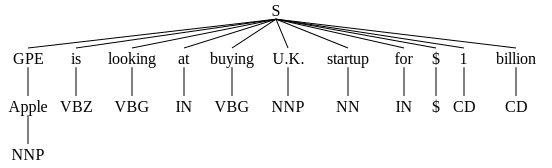

In [246]:
import svgling
chunked